
## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [6]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [8]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [9]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

### Key Takeaways from the Summary Statistics

* Most bookings are for solo travellers (Median `num_passengers` = 1)
* Booking behavior varies widely - some book last minute, others over a year in advance
* Most customers book around 85 days before departure , with some extreme cases.
* Morning flights (9AM) are the most common, and flights are evenly distributed across the week.
* Customers care about extra baggage (67%) but not preferred seating(30%)
* Only 15% of users actually complete their booking, so there's a high drop off rate.

In [10]:
df['wants_preferred_seat'].value_counts()

wants_preferred_seat
0    35152
1    14848
Name: count, dtype: int64

In [11]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

### Feature Engineering 

In [12]:
df['length_of_stay'].value_counts().index.sort_values(ascending=False)

Index([778, 773, 610, 603, 577, 573, 532, 517, 513, 510,
       ...
        19,  18,  17,   6,   5,   4,   3,   2,   1,   0],
      dtype='int64', name='length_of_stay', length=335)

### Binary Features

In [13]:
df['last_minute_booking'] = (df['purchase_lead'] < 7).astype(int)
df['weekend_flight'] = df['flight_day'].isin([6,7]).astype(int)
df['long_flight'] = (df['flight_duration'] > 8).astype(int)
df['return_trip'] = (df['length_of_stay'] > 0).astype(int)
    

In [14]:
df['last_minute_booking'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: last_minute_booking, Length: 50000, dtype: int64>

### Binning 'length_of_stay' into Categories 

In [15]:
def categorize_length(days):
    if days <= 7:
        return 'Short'
    elif days <= 30:
        return 'Medium'
    else: 
        return 'Long'

df['len_of_stay_category'] = df['length_of_stay'].apply(categorize_length)

In [16]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,last_minute_booking,weekend_flight,long_flight,return_trip,len_of_stay_category
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,1,0,1,Medium
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,1,0,1,Medium
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,0,1,Medium
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,1,0,1,Long
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,0,1,Medium


### Binning 'purchase_lead'


In [17]:
def categorize_purchase(days):
    if days < 7:
        return 'Last-Minute'
    elif days <= 30:
        return 'Early'
    elif days <= 100:
        return 'Advance'
    else:
        return 'Very Early'

df['purchase_lead_category'] = df['purchase_lead'].apply(categorize_purchase)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,last_minute_booking,weekend_flight,long_flight,return_trip,len_of_stay_category,purchase_lead_category
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,1,0,1,Medium,Very Early
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,1,0,1,Medium,Very Early
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,0,1,Medium,Very Early
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,1,0,1,Long,Advance
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,0,1,Medium,Advance


### Interactions Feautres 

In [18]:
df['baggage_and_meals'] = df['wants_extra_baggage'] * df['wants_in_flight_meals']
df['family_booking'] = (df['num_passengers']>2).astype(int)
df['high_spender'] = (df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals'] == 3).astype(int)


### Time Features 

In [20]:
df['morning_flight'] = (df['flight_hour'] < 12).astype(int)
df['peak_flight_time'] = df['flight_hour'].between(6,9) | df['flight_hour'].between(18,21)
df['midnight_flight'] = (df['flight_hour'] == 0).astype(int)

In [21]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,...,long_flight,return_trip,len_of_stay_category,purchase_lead_category,baggage_and_meals,family_booking,high_spender,morning_flight,peak_flight_time,midnight_flight
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,...,0,1,Medium,Very Early,0,0,0,1,True,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,...,0,1,Medium,Very Early,0,0,0,1,False,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,...,0,1,Medium,Very Early,0,0,0,0,False,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,...,0,1,Long,Advance,0,0,0,1,False,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,...,0,1,Medium,Advance,1,0,0,0,False,0


In [22]:
df.to_csv('customer_booking_enhanced.csv', index=False)

In [23]:
corr_df = df.corr(numeric_only=True)

In [24]:
crr_booking = corr_df['booking_complete'].sort_values(ascending=False)

In [25]:
crr_booking

booking_complete         1.000000
wants_extra_baggage      0.068139
wants_preferred_seat     0.050116
high_spender             0.047092
baggage_and_meals        0.038934
wants_in_flight_meals    0.026511
num_passengers           0.024116
last_minute_booking      0.017958
family_booking           0.017101
flight_hour              0.007127
return_trip              0.005627
peak_flight_time         0.002794
flight_day              -0.006986
weekend_flight          -0.007988
midnight_flight         -0.015641
morning_flight          -0.017048
purchase_lead           -0.022131
length_of_stay          -0.042408
flight_duration         -0.106266
long_flight             -0.108272
Name: booking_complete, dtype: float64

In [26]:
import matplotlib.pyplot as plt 
import seaborn as sns

### Feature Correlation Matrix 

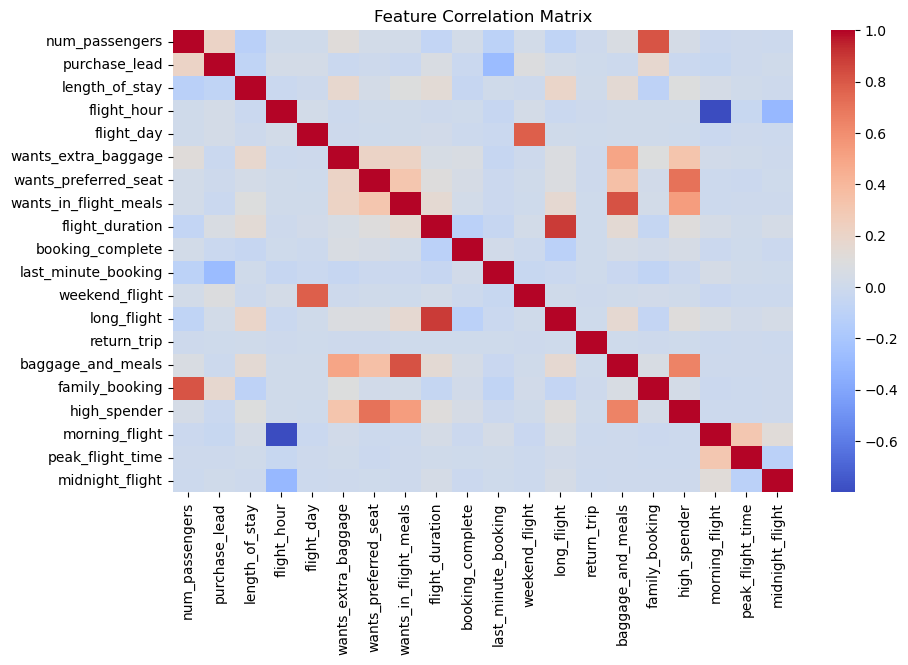

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_df, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

### Key Obervations:

* `booking_complete` has some positive correlation with:
  * wants_extra_baggage, wants_preferred_seat, wants_in_flight_meals -> Cutomers who opt for add-ons are more likely to complete their booking
  * return_trip -> People booking return flights may be more committed to completing the booking
  * family_booking -> Larger groups (families) might have a higher booking completion rate
  * high_spender -> High spenders are more likely to complete the booking.
* `booking_complete` has negative correlation with:
  * last_minute_booking -> People who book closer to departure may be less likely to finalize their booking.
  * midnight_flight -> FLights at midnight might have a lower completion rate.

### Booking Completion Distribution 

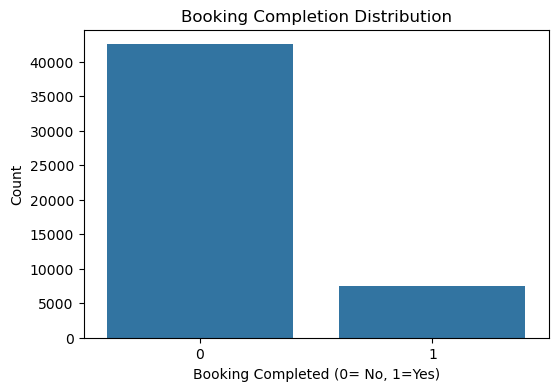

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['booking_complete'])
plt.title('Booking Completion Distribution')
plt.xlabel('Booking Completed (0= No, 1=Yes)')
plt.ylabel('Count')
plt.show()

In [32]:
completion_rate = df["booking_complete"].mean() * 100
print(f"Booking completion rate: {completion_rate:.2f}%")

Booking completion rate: 14.96%


### Last-Minute Booking Impact

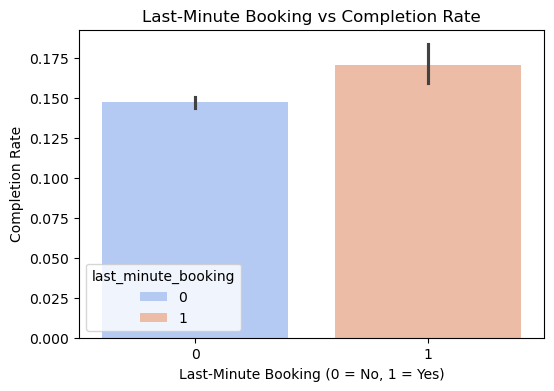

In [35]:
plt.figure(figsize=(6,4))
sns.barplot(x='last_minute_booking', y='booking_complete', hue= 'last_minute_booking',data=df, palette='coolwarm')
plt.title("Last-Minute Booking vs Completion Rate")
plt.xlabel("Last-Minute Booking (0 = No, 1 = Yes)")
plt.ylabel("Completion Rate")
plt.show()

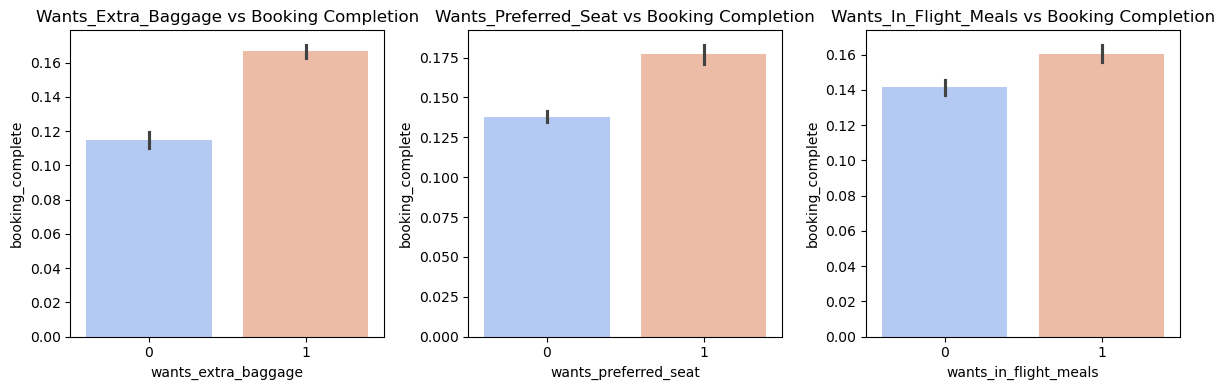

In [46]:
features = ["wants_extra_baggage", "wants_preferred_seat", "wants_in_flight_meals"]

plt.figure(figsize=(12,4))
for i,feature in enumerate(features, 1):
    plt.subplot(1,3,i)
    sns.barplot(x=feature,y='booking_complete', hue=feature, data=df, palette='coolwarm',legend=False)
    plt.title(f'{feature.title()} vs Booking Completion')

plt.tight_layout()
plt.show()

### Flight Hour & Booking Rate

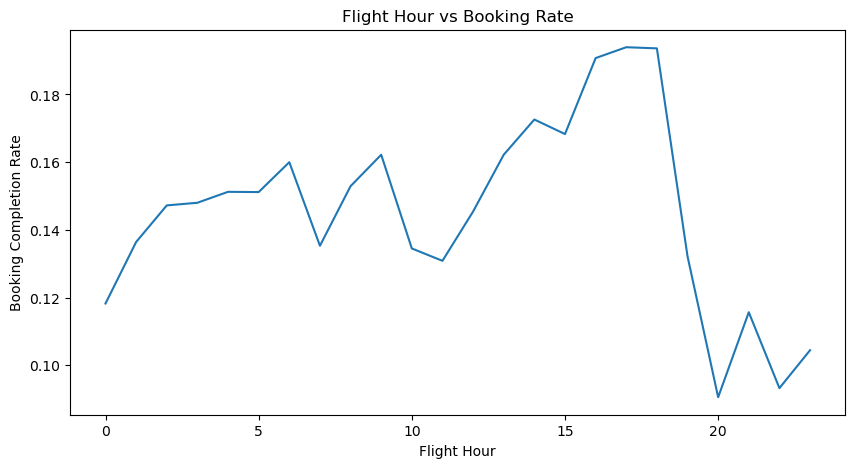

In [39]:
plt.figure(figsize=(10,5))
sns.lineplot(x='flight_hour',y='booking_complete',data=df,errorbar=None)
plt.title('Flight Hour vs Booking Rate')
plt.xlabel('Flight Hour')
plt.ylabel('Booking Completion Rate')
plt.show()

### Purchase Lead Time Distribution 

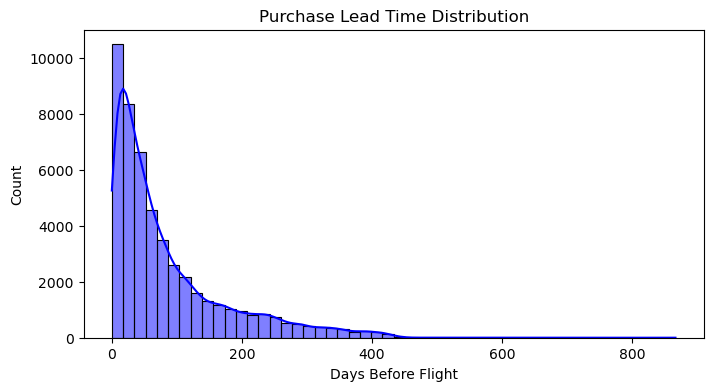

In [40]:
plt.figure(figsize=(8,4))
sns.histplot(df["purchase_lead"], bins=50, kde=True, color="blue")
plt.title("Purchase Lead Time Distribution")
plt.xlabel("Days Before Flight")
plt.ylabel("Count")
plt.show()

In [41]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,...,long_flight,return_trip,len_of_stay_category,purchase_lead_category,baggage_and_meals,family_booking,high_spender,morning_flight,peak_flight_time,midnight_flight
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,...,0,1,Medium,Very Early,0,0,0,1,True,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,...,0,1,Medium,Very Early,0,0,0,1,False,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,...,0,1,Medium,Very Early,0,0,0,0,False,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,...,0,1,Long,Advance,0,0,0,1,False,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,...,0,1,Medium,Advance,1,0,0,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,...,0,1,Short,Early,1,0,0,1,True,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,...,0,1,Short,Very Early,0,0,0,1,False,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,...,0,1,Short,Early,0,0,0,0,False,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,...,0,1,Short,Early,1,0,0,1,False,0


### Length of Stay Grouping 

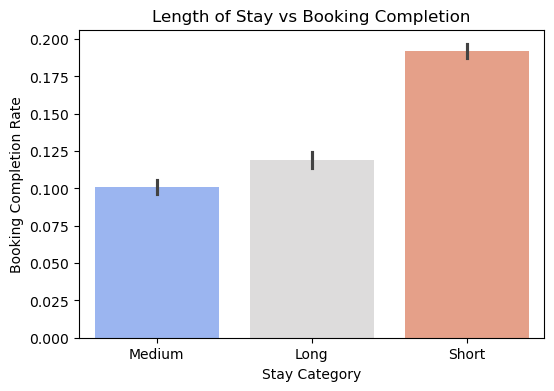

In [42]:
plt.figure(figsize=(6,4))
sns.barplot(x='len_of_stay_category',y='booking_complete',data=df,palette='coolwarm',hue='len_of_stay_category')
plt.title("Length of Stay vs Booking Completion")
plt.xlabel("Stay Category")
plt.ylabel("Booking Completion Rate")
plt.show()

In [48]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,...,long_flight,return_trip,len_of_stay_category,purchase_lead_category,baggage_and_meals,family_booking,high_spender,morning_flight,peak_flight_time,midnight_flight
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,...,0,1,Medium,Very Early,0,0,0,1,True,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,...,0,1,Medium,Very Early,0,0,0,1,False,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,...,0,1,Medium,Very Early,0,0,0,0,False,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,...,0,1,Long,Advance,0,0,0,1,False,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,...,0,1,Medium,Advance,1,0,0,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,...,0,1,Short,Early,1,0,0,1,True,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,...,0,1,Short,Very Early,0,0,0,1,False,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,...,0,1,Short,Early,0,0,0,0,False,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,...,0,1,Short,Early,1,0,0,1,False,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_passengers          50000 non-null  int64  
 1   sales_channel           50000 non-null  object 
 2   trip_type               50000 non-null  object 
 3   purchase_lead           50000 non-null  int64  
 4   length_of_stay          50000 non-null  int64  
 5   flight_hour             50000 non-null  int64  
 6   flight_day              50000 non-null  int64  
 7   route                   50000 non-null  object 
 8   booking_origin          50000 non-null  object 
 9   wants_extra_baggage     50000 non-null  int64  
 10  wants_preferred_seat    50000 non-null  int64  
 11  wants_in_flight_meals   50000 non-null  int64  
 12  flight_duration         50000 non-null  float64
 13  booking_complete        50000 non-null  int64  
 14  last_minute_booking     50000 non-null

## Training ML Model

In [50]:
# Scikit-Learn for ML 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Prepare the Data 

In [52]:
# Define features (X) and (y)
X = df.drop(columns=['booking_complete']) # Features (drop target column)
y = df['booking_complete'] # Target variable (1=booked, 0=not booked)

In [53]:
# Handling Cateogrical Variables 
X = pd.get_dummies(X, drop_first=True) # convert categorical to numeric

### Splitting Data into Training and Test sets

In [59]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Feaute Scaling (Imp for some models)

In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train your First Model (Random Forest)

In [62]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train) # Train the model 

RandomForestClassifier(random_state=42)

### Make Predictions & Evaluate 

In [63]:
y_pred = rf.predict(X_test)

#Accuracy Score 
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8544


In [65]:
# Classification Report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.54      0.12      0.19      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.56     10000
weighted avg       0.82      0.85      0.81     10000



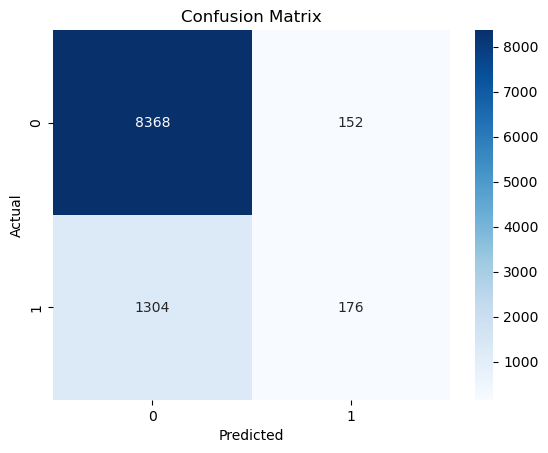

In [75]:
# Confusion Matrix 
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Hyperparameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100],
    'max_depth': [None, 10],
    'min_samples_split': [2,5]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters 
print("Best parameters:", grid_search.best_params_)

KeyboardInterrupt: 

In [77]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid,
                                  n_iter=5,cv=3,scoring='accuracy',n_jobs=1,random_state=42)
random_search.fit(X_train,y_train)

print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': None}


### Train and Evaluate the Best Model

In [79]:
#train final model with best parameters 
best_rf = RandomForestClassifier(n_estimators=50,min_samples_split=5, max_depth=None, random_state=42)
best_rf.fit(X_train,y_train)

# Predictions on the test set 
y_pred = best_rf.predict(X_test)

### Evaluate Model Performance 

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.53      0.09      0.15      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.54      0.53     10000
weighted avg       0.81      0.85      0.81     10000



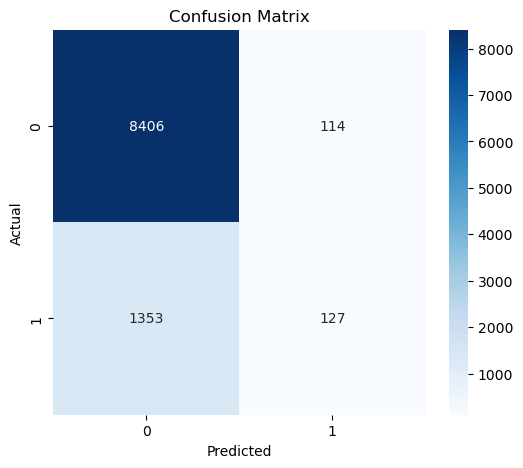

In [81]:
# Confusion Matrix Visualization 
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

In [82]:
# Train with class balancing 
best_rf = RandomForestClassifier(n_estimators=50,min_samples_split=5,max_depth=None,
                                class_weight='balanced', random_state=42)
best_rf.fit(X_train,y_train)

#PRedict again 
y_pred = best_rf.predict(X_test)

#Evaluate again 
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8520
           1       0.47      0.28      0.35      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.61      0.63     10000
weighted avg       0.82      0.85      0.83     10000



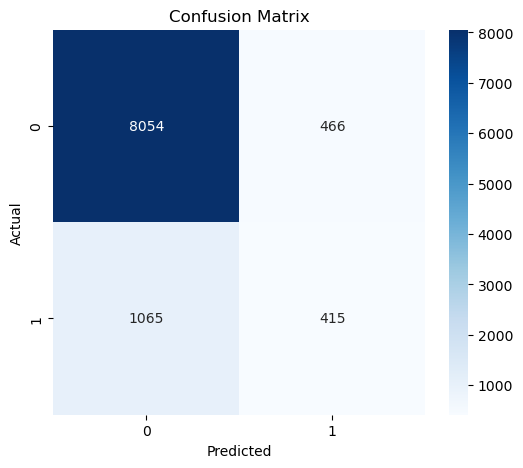

In [83]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [84]:
import numpy as np

#get probability scores instead of direct predictions 
y_proba = best_rf.predict_proba(X_test)[:, 1] # get probability of class 1

#Set new threshold (default is 0.5, lets try 0.3)
new_threshold = 0.3
y_pred_new = (y_proba >= new_threshold).astype(int)

#Evaluate again 
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      8520
           1       0.32      0.63      0.43      1480

    accuracy                           0.75     10000
   macro avg       0.62      0.70      0.64     10000
weighted avg       0.83      0.75      0.78     10000



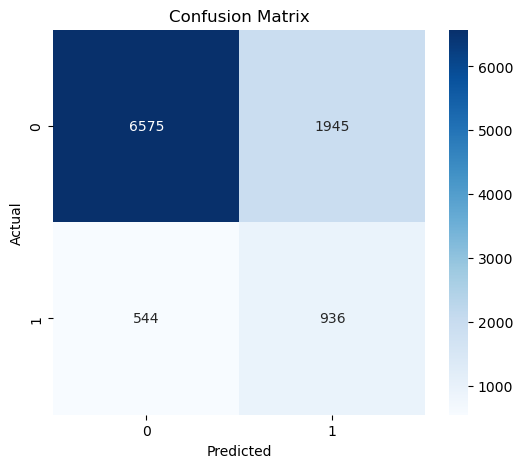

In [85]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_new), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [86]:
from imblearn.over_sampling import SMOTE 

In [93]:
#Apply SMOTE 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train,y_train)

#Train on resampled data 
rf_smote = RandomForestClassifier(n_estimators=50, class_weight="balanced", random_state=42)
rf_smote.fit(X_resampled,y_resampled)

#Predict probabilities 
y_proba_smote = rf_smote.predict_proba(X_test)[:,1]

#Set new threshold 
new_threshold = 0.27
y_pred_smote = (y_proba_smote >= new_threshold).astype(int)

#Evaluate 
print(classification_report(y_test,y_pred_smote))


              precision    recall  f1-score   support

           0       0.91      0.82      0.86      8520
           1       0.34      0.53      0.42      1480

    accuracy                           0.78     10000
   macro avg       0.63      0.68      0.64     10000
weighted avg       0.83      0.78      0.80     10000



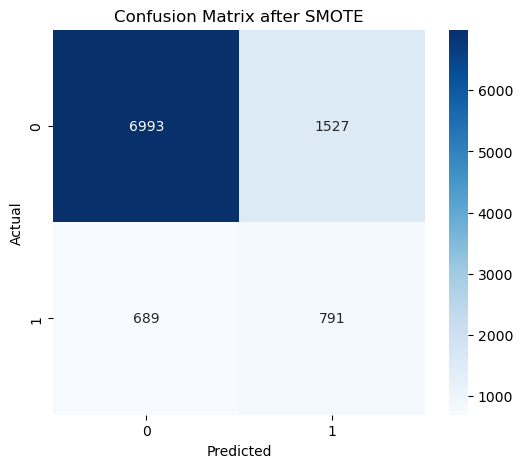

In [94]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_pred_smote), annot=True, fmt='d',cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after SMOTE')
plt.show()

## Precision Recall Curve

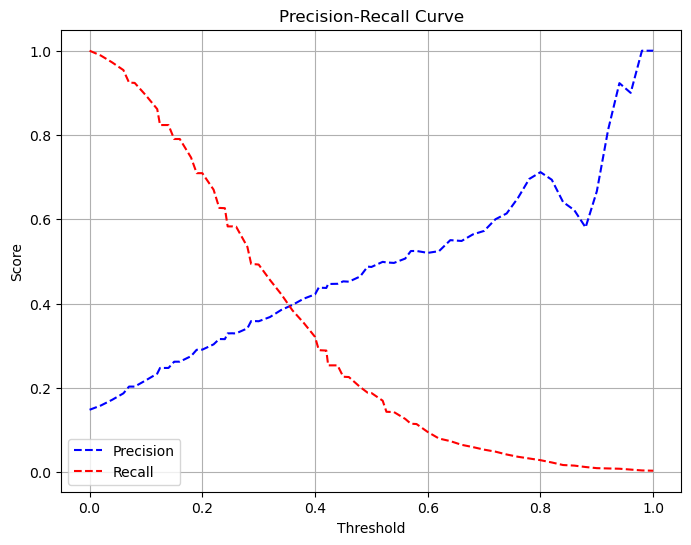

In [96]:
from sklearn.metrics import precision_recall_curve

#get precision and recall values for different thresholds 
precision, recall , thresholds = precision_recall_curve(y_test,y_proba_smote)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], "b--", label='Precision')
plt.plot(thresholds, recall[:-1], 'r--',label = 'Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

## ROC Curve

In [97]:
from sklearn.metrics import roc_curve, auc

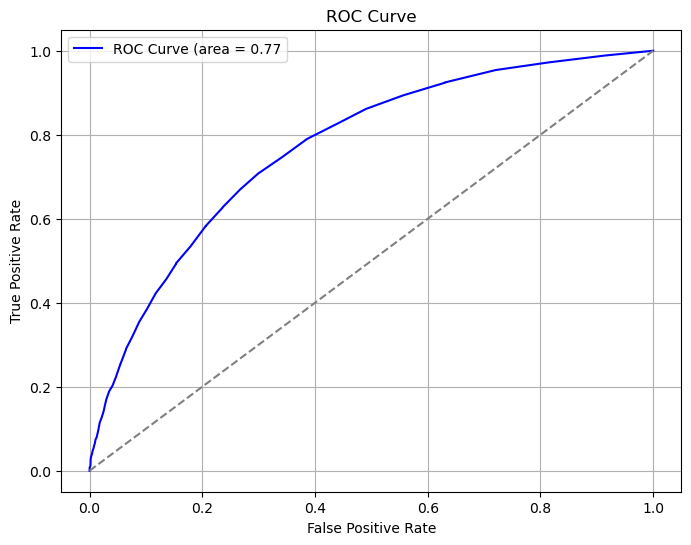

In [99]:
fpr , tpr, thresholds = roc_curve(y_test,y_proba_smote)
roc_auc =auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='blue', label=f"ROC Curve (area = {roc_auc:.2f}")
plt.plot([0,1],[0,1],color='gray',linestyle='--') # Random classifier line 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

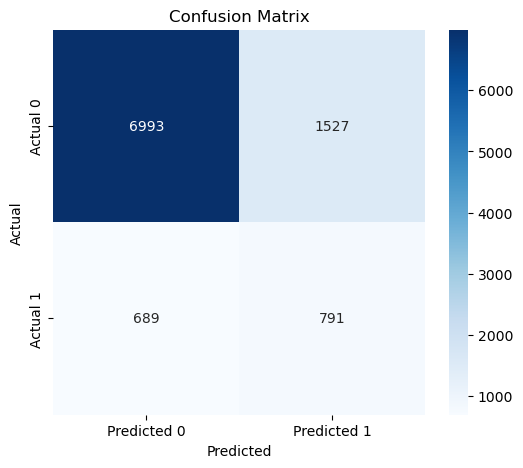

In [101]:
cm = confusion_matrix(y_test, y_pred_smote)  # Use y_pred for predictions at chosen threshold

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()